In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Penn World Table 10.01

In [5]:
inputs = {
    'data': {
        'path': './data/raw_data/pwt1001.xlsx',
        'file_type': 'excel',
        'sheet_name': 'Data',
        'variables': {
            'countrycode': 'ISO code',
            'country': 'Country Name',
            'year': 'year',
            'statcap': 'Statistical Capacity Indicator',
            'pop': 'Population (millions)',
            'hc': 'Human Capital Index',
            'emp': 'Number of People Engaged (millions)',
            'avh': 'Average Annual Hours Worked by Person Engaged',
            'cgdpo': 'Output-Side Real GDP at Current PPPs (Mill. 2017US$)',
            'csh_c': 'Household Consumption',
            'csh_i': 'Capital Formation',
            'csh_g': 'Government Consumption',
            'csh_x': 'Merchandise Exports',
            'csh_m': 'Merchandise Imports',
            'csh_r': 'Residual Trade and GDP Statistical Discrepancy',
            'cn': 'Capital Stock at Current PPPs (Mill. 2017US$)',
            'ck': 'Capital Services at Current PPPs (USA=1)',
            'ctfp': 'TFP level at Current PPPs (USA=1)',
            'cwtfp': 'Welfare-Relevant TFP levels at Current PPPs (USA=1)'}
    }
}

In [49]:
class PWT:

    def __init__(self, inputs):
        self.inputs = inputs
        # Read and Prepare data
        self.data = self.read_data()

    #future development: create interactive API
    def api(self):
        self.actions = {
            'data selection': {
                'get_country_data': 'get_country_data(country)',
                'get_countries_data': 'get_countries_data(countries)',
                'get_county_variable_data': 'get_county_variable_data(country, variable)',
                'get_countries_variable_data': 'get_countries_variable_data(countries, variable)',
                'get_country_year_data': 'get_country_year_data(country, year)',
                'get_countries_year_data': 'get_countries_year_data(countries, year)',
                'get_country_year_variable_data': 'get_country_year_variable_data(country, year, variable)',
                'get_countries_year_variable_data': 'get_countries_year_variable_data(countries, year, variable)'
            },
            'data visualization': {
                'graph_country_variable': 'graph_country_variable(country, variable)',
                'graph_countries_variable': 'graph_countries_variable(countries, variable)'
            }
        }

    ##############################################################################
    ##### DATA PREPARATION #####
    ##############################################################################

    # Read data from the file
    def read_data(self):
        data = pd.read_excel(self.inputs['data']['path'], sheet_name=self.inputs['data']['sheet_name'])
        data = self.reduce_data(data)
        # Set variables information
        self.set_variables_information()
        return data

    # Reduce data to only the variables we need
    def reduce_data(self, data):
        data = data[self.inputs['data']['variables'].keys()]
        # index by country and year
        data.set_index(['country', 'year'], inplace=True)
        return data
    
    # Set variables information
    def set_variables_information(self):
        self.variables = {}
        for key in self.inputs['data']['variables']:
            self.variables[key] = self.inputs['data']['variables'][key]

    ##############################################################################
    ##### DATA SELECTION #####
    ##############################################################################

    # select specific country - all data
    def get_country_data(self, country):
        return self.data.loc[country]
    
    # select list of countries - all data
    def get_countries_data(self, countries):
        token = {}
        for country in countries:
            token[country] = self.get_country_data(country)
        return token
    
    # select specific country - specific variable
    def get_county_variable_data(self, country, variable):
        return self.get_country_data(country)[variable]
    
    # select list of countries - specific variable
    def get_countries_variable_data(self, countries, variable):
        token = {}
        for country in countries:
            token[country] = self.get_county_variable_data(country, variable)
        return token
    
    # select specific country - specific year - all data
    def get_country_year_data(self, country, year):
        return self.get_country_data(country).loc[year]
    
    # select list of countries - specific year - all data
    def get_countries_year_data(self, countries, year):
        token = {}
        for country in countries:
            token[country] = self.get_country_year_data(country, year)
        return token
    
    # select specific country - specific year - specific variable
    def get_country_year_variable_data(self, country, year, variable):
        return self.get_country_year_data(country, year)[variable]
    
    # select list of countries - specific year - specific variable
    def get_countries_year_variable_data(self, countries, year, variable):
        token = {}
        for country in countries:
            token[country] = self.get_country_year_variable_data(country, year, variable)
        return token
    
    ##############################################################################
    ##### DATA VISUALIZATION #####
    ##############################################################################

    # Graph country variable
    def graph_country_variable(self, country, variable):
        data = self.get_county_variable_data(country, variable)
        data.plot(title=variable + ' in ' + country, legend=True, figsize=(10, 5))
        plt.show()

    # Graph countries variable
    def graph_countries_variable(self, countries, variable):
        data = self.get_countries_variable_data(countries, variable)
        data = pd.DataFrame(data)
        data.plot(title=variable + ' in ' + ', '.join(countries), legend=True, figsize=(10, 5))
        plt.show()


In [50]:
pwt = PWT(inputs)

In [33]:
chile = pwt.get_country_data('Chile')

In [34]:
region = pwt.get_countries_data(['Chile', 'Argentina', 'Mexico'])

In [42]:
pwt.get_countries_year_variable_data(['Chile', 'Argentina', 'Mexico'], 2017,'cgdpo')

{'Chile': 422309.03125, 'Argentina': 1022513.25, 'Mexico': 2363270.5}

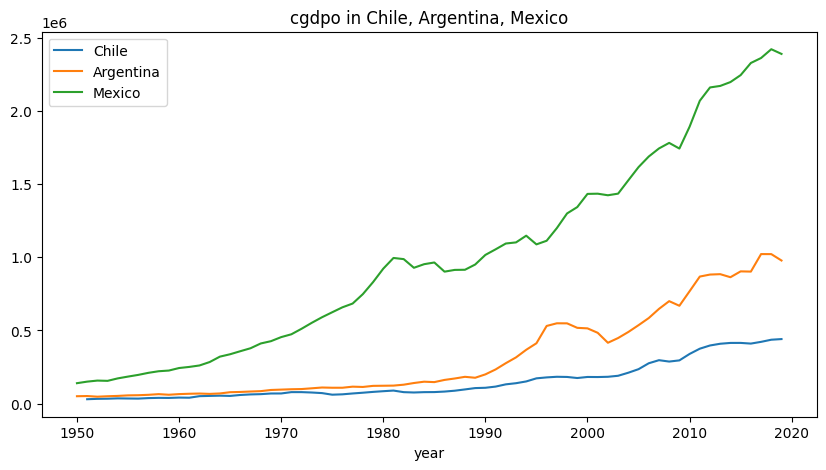

In [52]:
#pwt.graph_country_variable('Chile', 'cgdpo')
pwt.graph_countries_variable(['Chile', 'Argentina', 'Mexico'], 'cgdpo')